<a href="https://colab.research.google.com/github/Mudassir4545/ANN-on-Iris-Dataset/blob/main/Iris_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN using the Iris dataset 
Will be using the Iris dataset retrieved from Kaggle in an ANN

Will be done in three parts:

1) Importing, visualizing, and preparing the dataset

2) Creating an ANN using Sklearn

3) Creating an ANN using Tensorflow






## 1) Importing, Visualizing, and Preparing the dataset



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from IPython.display import Image
from sklearn.utils import shuffle

from sklearn.neural_network import MLPClassifier
import tensorflow.compat.v1 as tf


In [ ]:
tf.disable_v2_behavior()

In [ ]:
data = sns.load_dataset("iris")


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


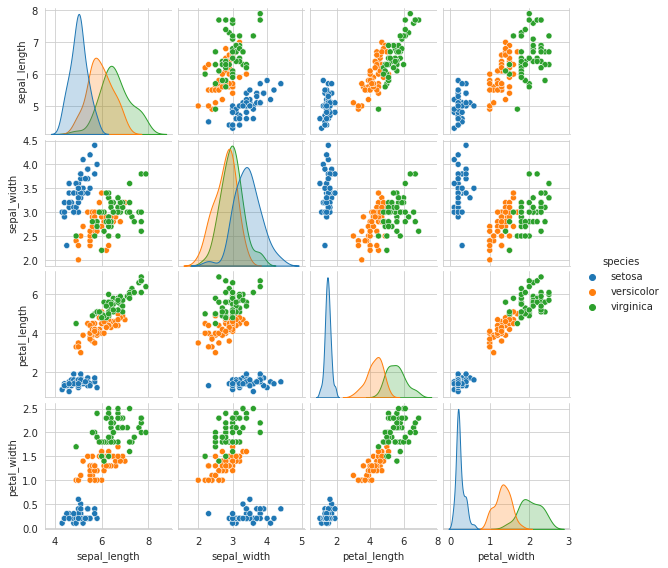

In [ ]:
#Visualize pair plot
sns.pairplot(data,hue='species',size=2)

## Make Data Usable
 



In [ ]:
def to_number(species):
    if species == 'setosa':
        return 0
    if species == 'versicolor':
        return 1
    if species == 'virginica':
        return 2

def usable_data(data):
    data = shuffle(data)
    Y = data['species'].apply(to_number).to_numpy()
    data.drop(data.columns[4], axis = 1, inplace=True)
    data_norm = ((data - data.mean())/data.std()).to_numpy()
    return data_norm, Y
    

In [ ]:
Y

array([2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1])

## Train Test Split
We can split the data into our training and testing. For this case I've used 75% of the set for training and 25% for 
testing.


In [ ]:
X, Y = usable_data(data)

#Split the data into training and testing
Ntrain = int(.75*len(X))
Xtrain = X[:Ntrain]
Xtest = X[Ntrain:]
Ytrain = Y[:Ntrain]
Ytest = Y[Ntrain:]

## 2. Building a Neural Network in Sklearn

Sklearn has made a pretty simple way to build a basic neural network. The documentation can be found here:
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

For this model I will be using all the defaults but will change the number of iterations from the default of 200 to 300. I also use 2 hidden layers of size 100 each

Once the model is fit you can again see the defaults used for fitting.

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=300)

In [ ]:
model.fit(Xtrain, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300)

## Predicting

To see how well our test data is predicted we can run the predict method. 
We can also see specifically each target tested and it's corresponding predictions.

In [ ]:
train_accuracy = model.score(Xtrain, Ytrain)
test_accuracy = model.score(Xtest, Ytest)
print ("Train accuracy:", train_accuracy, "Test accuracy:", test_accuracy ,"\n")



Train accuracy: 1.0 Test accuracy: 0.9210526315789473 



## Accuracy 

For the test data we get an accuracy of 100%. Since this is such a small dataset the accuracy could easily be different based upon the way the data was shuffled.

## 3. Building a Neural Network in Tensorflow



In [ ]:
def error_rate(p, t): #takes in prediction and indicators (both arrays, not matricies)
    return np.mean(p != t)

def one_hot_encoded(y):
    N = len(y)
    ind = np.zeros((N, max(Y)+1))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

Ytrain_ind = one_hot_encoded(Ytrain)
Ytest_ind = one_hot_encoded(Ytest)

## Setup some dimensions and parameters

We can define some basic parameters. N = number of samples in our training set (113), D = number of features (4), M1 = number of hidden units in our first layer (100). M2 = number of hidden units in our second layer (100). K = number of output possibilities (3).

Our learning rate will be the same as from the example above

In [ ]:
N, D = Xtrain.shape
M1 = 100
M2 = 100
K = max(Y)+ 1

lr = 0.0001

## Initialize Weights and Biases and setup variables in Tensorflow



In [ ]:
#Initilize Weights and Biases
# Weight control signal or strenght between two neurons
W1_init = np.random.randn(D, M1) / 4
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

## Creating the Tensorflow placeholder variable to feed into

Now we setup our placeholder variables. At this point X and T have no values but eventually our training data and labels will be fed into X and T which will be used in our Optimizer which in turn will minimize the cost function. 


In [ ]:
 # A placeholder is simply a variable that we will assign data to at a later date
 # placeholder allows us to create our operations and build our computation graph, without needing the data
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T') #indicator matrix

## Define the Model (Forward Propagation)

It's time to define our forward prop model. This takes our input data and calculates a "guess". We use the relu as the activation function and we end up with logits at the end. We will eventually want a softmax calculation but Tensorflow requires only logits and will perform the softmax calculation within the cost function.

In [ ]:
Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
Yish = tf.matmul(Z2, W3) + b3 #Output is logits, Cost function does the softmax.

## Define the Cost Function and the Optimizer

We can use define the Cross Entropy error function and the optimizer we wish to use to train it. Since Tensorflow provides the softmax calculation we will supply it with only the logits from our Forward Prop calculation. We can then train it using the RMS Prop Optimizer.

In [ ]:
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = Yish, labels = T))
train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

In [ ]:
#Setup to calculate error rate
#takes in the forward prop logits (guesses)
predict_op = tf.argmax(Yish, 1) #Axis = 1, will break if "axis = 1"

## Training the model



Iteration: 0, Cost: 40.72100830078125, Error: 0.5789473684210527, Accuracy: 42.10526315789473
Iteration: 10, Cost: 26.18425941467285, Error: 0.15789473684210525, Accuracy: 84.21052631578947
Iteration: 20, Cost: 17.664461135864258, Error: 0.10526315789473684, Accuracy: 89.47368421052632
Iteration: 30, Cost: 14.662886619567871, Error: 0.13157894736842105, Accuracy: 86.8421052631579
Iteration: 40, Cost: 13.824994087219238, Error: 0.15789473684210525, Accuracy: 84.21052631578947
Iteration: 50, Cost: 13.19125747680664, Error: 0.13157894736842105, Accuracy: 86.8421052631579
Iteration: 60, Cost: 12.306096076965332, Error: 0.13157894736842105, Accuracy: 86.8421052631579
Iteration: 70, Cost: 11.536527633666992, Error: 0.13157894736842105, Accuracy: 86.8421052631579
Iteration: 80, Cost: 10.87838363647461, Error: 0.13157894736842105, Accuracy: 86.8421052631579
Iteration: 90, Cost: 10.315735816955566, Error: 0.10526315789473684, Accuracy: 89.47368421052632
Iteration: 100, Cost: 9.928022384643555, 

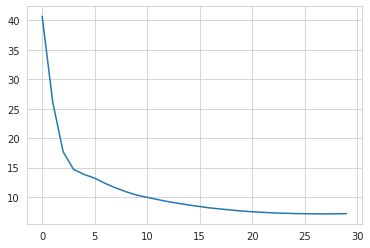

In [ ]:
track_cost = []
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
        
    for i in range(300):
        session.run(train_op, feed_dict = {X: Xtrain, T: Ytrain_ind})
            
        if i % 10 == 0:
            test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
            prediction = session.run(predict_op, feed_dict={X: Xtest})
            err = error_rate(prediction, Ytest)
            accuracy = 1 - err
        
            print ('Iteration: {}, Cost: {}, Error: {}, Accuracy: {}'.format(i, test_cost, err, accuracy*100))
            track_cost.append(test_cost)
            
plt.plot(track_cost)
plt.show()            

## Accuracy
We can see that the final accuracy is about 92%


## How Many Numbers of Neurons and number of layers in hidden layers?

The number of hidden neurons should be between the size of the input layer and the size of the output layer. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer. The number of hidden neurons should be less than twice the size of the input layer.

Moreover, the number of neurons and number layers required for the hidden layer also depends upon training cases, amount of outliers, the complexity of, data that is to be learned, and the type of activation functions used.

# How many Numbers of Neurons in inputs and Output layers?

The number of neurons in the input layer is equal to the number of features in the data and in very rare cases, there will be one input layer for bias. Whereas the number of neurons in the output depends on whether is the model is used as a regressor or classifier. If the model is a regressor then the output layer will have only a single neuron but in case if the model is a classifier it will have a single neuron or multiple neurons depending on the class label of the model

# Why pruning is used?

Pruning can be used to optimize the number of neurons in the hidden and increases computational and resolution performances. It trims the neurons during training, by identifying those which have no impact on the performance of the network. It can also be identified by checking the weights of the neurons, weights that are close to zero have relatively less importance. In pruning such nodes are removed.